# TEXT_ANALYSIS 
## (YouTube Case Study)

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
comments = pd.read_csv('UScomments.csv',on_bad_lines = 'warn')

Skipping line 41589: expected 4 fields, saw 11
Skipping line 51628: expected 4 fields, saw 7
Skipping line 114465: expected 4 fields, saw 5

Skipping line 142496: expected 4 fields, saw 8
Skipping line 189732: expected 4 fields, saw 6
Skipping line 245218: expected 4 fields, saw 7

Skipping line 388430: expected 4 fields, saw 5

C:\Users\Aryan\AppData\Local\Temp\ipykernel_20760\2558458763.py:1: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments = pd.read_csv('UScomments.csv',on_bad_lines = 'warn')


In [ ]:
# SENTIMENT ANALYSIS ON YOUTUBE COMMENTS

In [5]:
comments.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [6]:
comments.isnull()

,video_id,comment_text,likes,replies
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
691395,False,False,False,False
691396,False,False,False,False
691397,False,False,False,False
691398,False,False,False,False


In [7]:
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [8]:
comments.dropna(inplace = True)

In [10]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [11]:
from textblob import TextBlob

#### TextBlob, a Python library, can manipulate and analyze text in multiple ways—whether it’s sentiment analysis, translation, or part-of-speech tagging. 

In [12]:
comments.head(6)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0


In [13]:
TextBlob("Logan Paul it's yo big day ‼️‼️‼").sentiment.polarity

0.0

In [14]:
comments.shape

(691374, 4)

In [15]:
sample_df = comments[0:1000]

In [18]:
sample_df.shape

(1000, 4)

In [96]:
polarity = []
for comment in comments['comment_text']:
    try:polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)
        

# WORDCLOUD ANALYSIS ON YOUTUBE COMMENTS

In [97]:
len(polarity)

691374

In [98]:
comments['polarity'] = polarity

In [99]:
comments.head(5)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.0
4,XpVt6Z1Gjjo,trending 😉,3,0,0.0


In [100]:
filter1 = comments['polarity'] == 1

In [101]:
comments_positive = comments[filter1]

In [102]:
filter2 = comments['polarity'] == -1

In [103]:
comments_negative = comments[filter2]

In [104]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [105]:
!pip install wordcloud

In [106]:
from wordcloud import WordCloud, STOPWORDS

#### WordCloud collects words from a text and arranges them into a visually striking formation. The more frequently a word appears, the larger it becomes, floating like a bold cloud in a sky full of ideas.

In [107]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

(-0.5, 399.5, 199.5, -0.5)

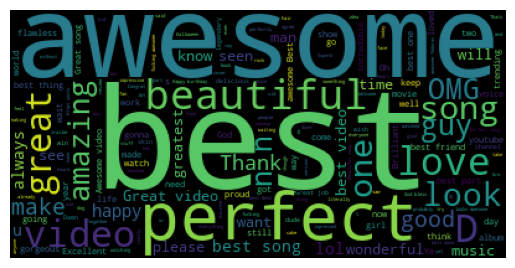

In [112]:
plt.imshow(wordcloud1)
plt.axis('off')

In [108]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [109]:
type(comments['comment_text'])

pandas.core.series.Series

In [110]:
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [111]:
wordcloud1 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

In [113]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [114]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

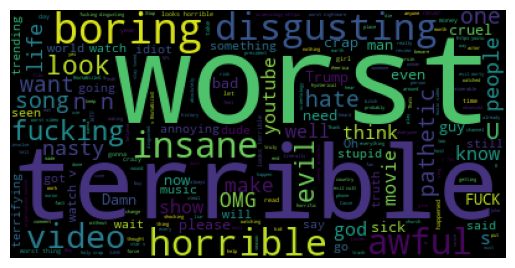

In [115]:
plt.imshow(wordcloud2)
plt.axis('off')

# EMOJI ANALYSIS

In [116]:
!pip install emoji==2.2.0

In [117]:
import emoji

In [ ]:
#### Emoji library translates the digital world into a rich tapestry of emotions and symbols. It turns plain text into a colorful, expressive character.

In [118]:
emoji.__version__

'2.2.0'

In [119]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [120]:
emoji_list = []
for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)

In [121]:
emoji_list

['😍', '❤', '❤', '❤', '😘']

In [122]:
all_emojis_list = []
for comment in comments['comment_text'].dropna():
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [123]:
all_emojis_list[0:10]

['‼', '‼', '‼', '😉', '😭', '👍', '🏻', '❤', '😍', '💋']

In [124]:
from collections import Counter

#### Counter class in Python orchestrates the counting of elements in a collection. It tallies the frequency of each element

In [125]:
Counter(all_emojis_list).most_common(10)

[('😂', 36987),
 ('😍', 33453),
 ('❤', 31119),
 ('🔥', 8694),
 ('😭', 8398),
 ('👏', 5719),
 ('😘', 5545),
 ('👍', 5476),
 ('💖', 5359),
 ('💕', 5147)]

## Emoji library translates the digital world into a rich tapestry of emotions and symbols. It turns plain text into a colorful, expressive character.

In [126]:
emojis = [Counter(all_emojis_list).most_common(10)[i][0] for i in range(10)]

In [127]:
emojis

['😂', '😍', '❤', '🔥', '😭', '👏', '😘', '👍', '💖', '💕']

In [128]:
freqs = [Counter(all_emojis_list).most_common(10)[i][1] for i in range(10)]

In [129]:
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

In [130]:
import plotly.graph_objs as go
from plotly.offline import iplot

#### Plotly allows you to shape raw data into interactive, visually compelling stories.

In [131]:
trace = go.Bar(x = emojis, y = freqs)

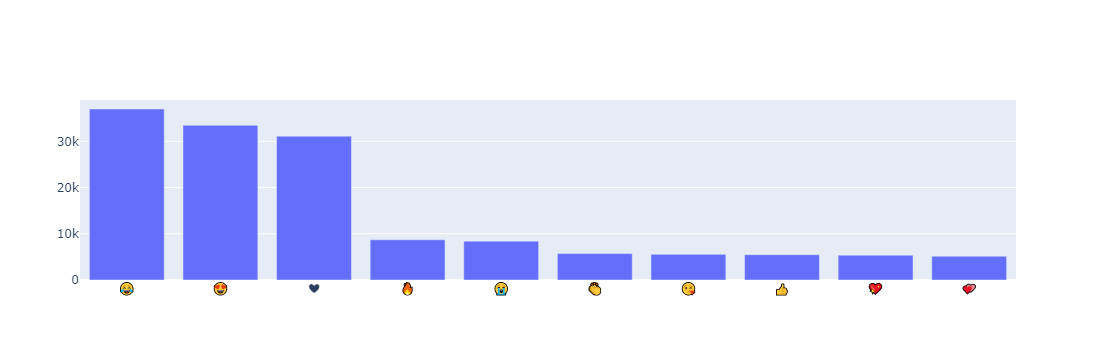

In [132]:
iplot([trace])

# COLLECTION OF DATA FROM YOUTUBE 

In [133]:
import os

In [134]:
files = os.listdir(r'C:\Users\Aryan\OneDrive\Desktop\Udemy Courses\additional_data')

In [135]:
files

['CAvideos.csv',
 'CA_category_id.json',
 'DEvideos.csv',
 'DE_category_id.json',
 'FRvideos.csv',
 'FR_category_id.json',
 'GBvideos.csv',
 'GB_category_id.json',
 'INvideos.csv',
 'IN_category_id.json',
 'JPvideos.csv',
 'JP_category_id.json',
 'KRvideos.csv',
 'KR_category_id.json',
 'MXvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'RU_category_id.json',
 'USvideos.csv',
 'US_category_id.json']

In [136]:
files_csv = [file for file in files if '.csv' in file]

In [137]:
files_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [138]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

#### Warnings library softly notifies you about potential issues in your code. It whispers these alerts so you can address them if needed

In [139]:
import pandas as pd
full_df = pd.DataFrame()
path = r'C:\Users\Aryan\OneDrive\Desktop\Udemy Courses\additional_data'

for file in files_csv:
    current_df = pd.read_csv(path + '/' + file, encoding = 'iso 8859-1', on_bad_lines = 'warn')

full_df = pd.concat([full_df,current_df], ignore_index = True)

In [140]:
full_df.shape

(40949, 16)

# EXPORT DATA INTO VARIOUS FILE FORMATS LIKE : .csv, .json, db

In [141]:
full_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
40944    False
40945    False
40946    False
40947    False
40948    False
Length: 40949, dtype: bool

In [142]:
full_df[full_df.duplicated()].shape

(48, 16)

In [143]:
full_df = full_df.drop_duplicates()

In [144]:
full_df.shape

(40901, 16)

In [145]:
full_df.to_csv(r'C:\Users\Aryan\OneDrive\Desktop\Udemy Courses\Youtube/youtube_sample.csv', index = False)

In [146]:
full_df.to_json(r'C:\Users\Aryan\OneDrive\Desktop\Udemy Courses\Youtube/youtube_sample.json')

In [147]:
from sqlalchemy import create_engine

In [148]:
engine = create_engine(r'sqlite:///C:\Users\Aryan\OneDrive\Desktop\Udemy Courses\Youtube/youtube_sample.sqlite')

In [149]:
full_df.to_sql('Users', con = engine, if_exists = 'append')

40901

# ANALYSIS OF CATEGORIES TO OBTAIN MAXIMUM LIKES

In [150]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [151]:
full_df['category_id'].unique()

array([22, 24, 23, 28,  1, 25, 17, 10, 15, 27, 26,  2, 19, 20, 29, 43],
      dtype=int64)

In [152]:
json_df = pd.read_json(r'C:\Users\Aryan\OneDrive\Desktop\Udemy Courses\additional_data/US_category_id.json')

In [153]:
json_df

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...","{'kind': 'youtube#videoCategory', 'etag': '""m2..."


In [154]:
json_df['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [155]:
json_df['items'][1]

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
 'id': '2',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Autos & Vehicles',
  'assignable': True}}

In [156]:
cat_dict = {}

for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [157]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [159]:
full_df.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


<Axes: xlabel='likes', ylabel='category_name'>

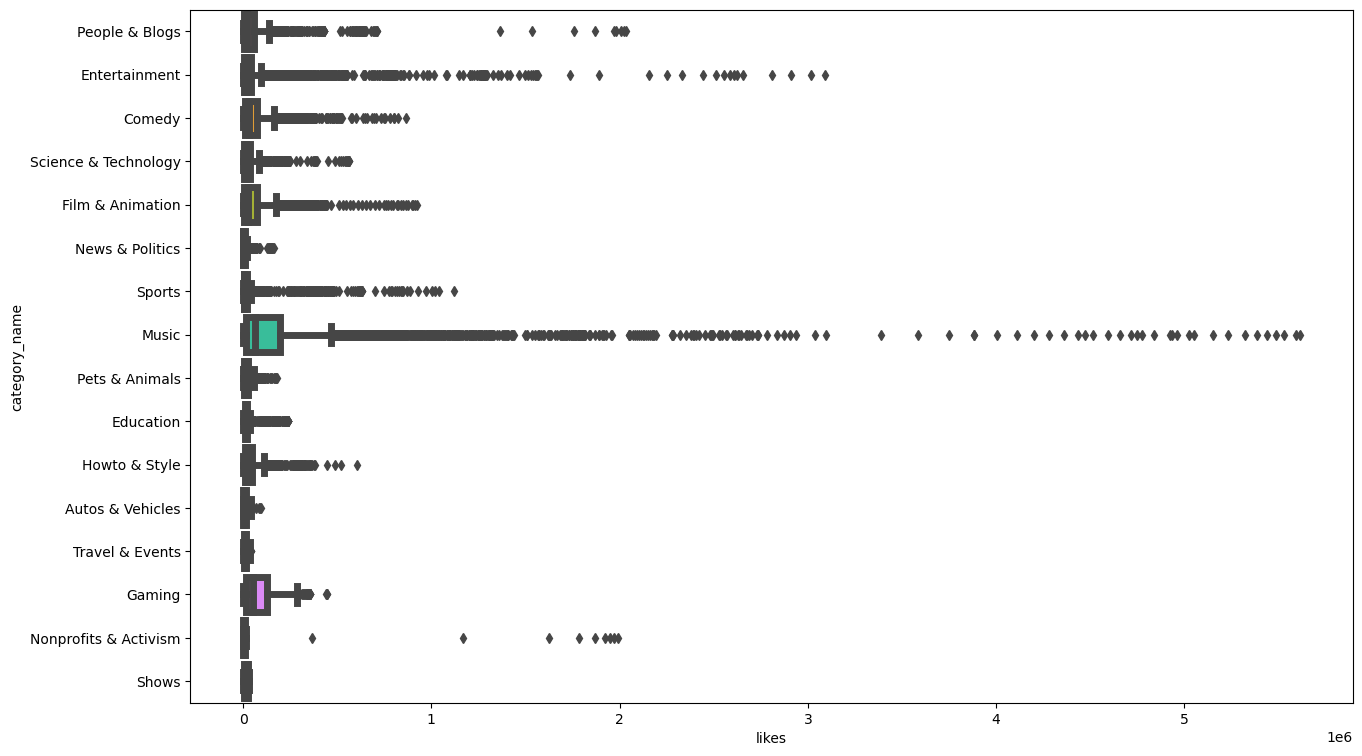

In [236]:
plt.figure(figsize = (15,9),facecolor = 'White',frameon = True, edgecolor ='Black')
sns.boxplot(x = 'likes', y = 'category_name', data = full_df, linewidth = 5, saturation = 1)

# ANALYSIS OF AUDIENCE TO FIND ENGAGED ONES

In [238]:
full_df['like_rate'] = (full_df['likes']/full_df['views']) * 100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views']) * 100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views']) * 100

<Axes: xlabel='like_rate', ylabel='category_name'>

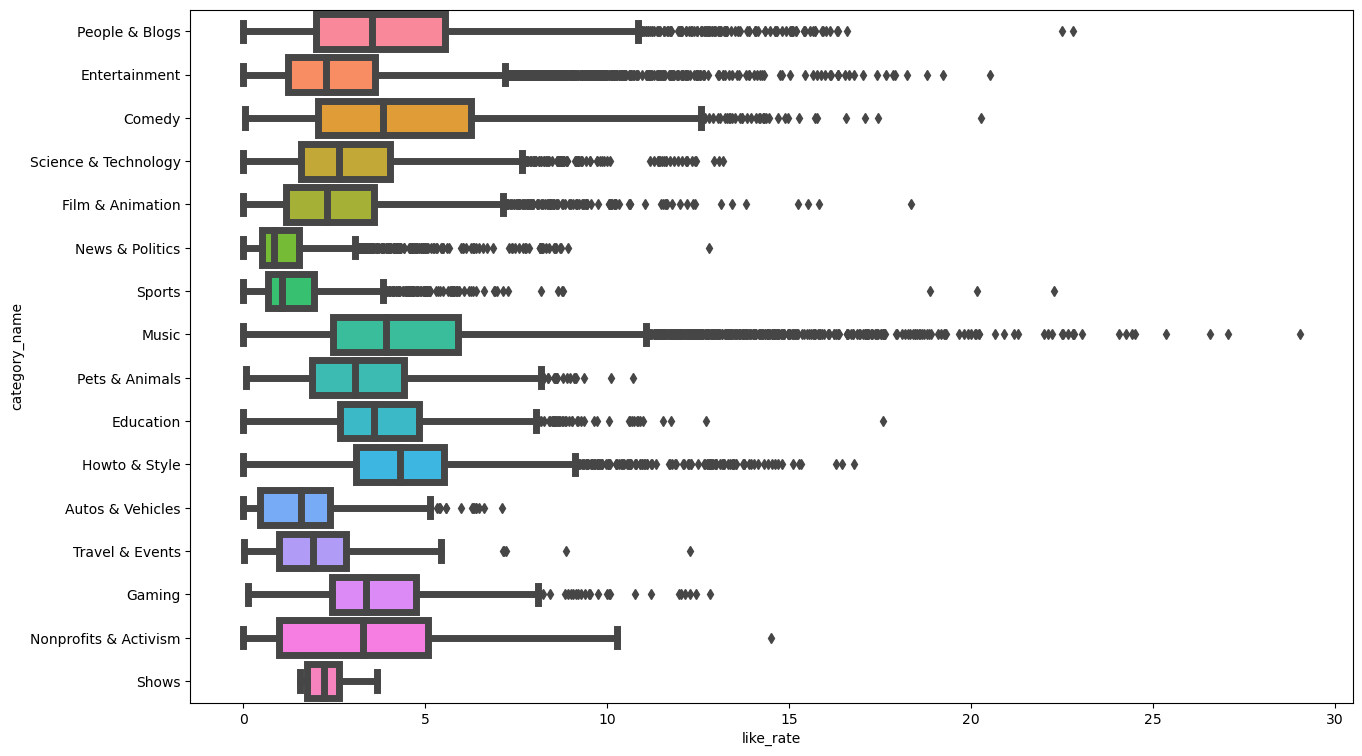

In [248]:
plt.figure(figsize = (15,9),facecolor = 'White',frameon = True, edgecolor ='Black')
sns.boxplot(x = 'like_rate', y = 'category_name', data = full_df, linewidth = 5, saturation = 1)

<Axes: xlabel='views', ylabel='likes'>

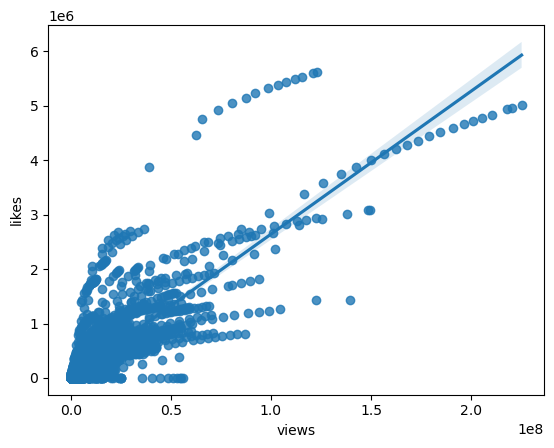

In [250]:
sns.regplot(x = 'views', y = 'likes', data = full_df)

In [252]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'like_rate',
       'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [258]:
full_df[['views', 'likes', 'dislikes']]

,views,likes,dislikes
0,748374,57527,2966
1,2418783,97185,6146
2,3191434,146033,5339
3,343168,10172,666
4,2095731,132235,1989
...,...,...,...
40944,1685609,38160,1385
40945,1064798,60008,382
40946,1066451,48068,1032
40947,5660813,192957,2846


# HEATMAP FOR CORRELATION

In [262]:
full_df_corr = full_df[['views', 'likes', 'dislikes']].corr()

In [264]:
full_df_corr

,views,likes,dislikes
views,1.000000,0.849179,0.472216
likes,0.849179,1.000000,0.447188
dislikes,0.472216,0.447188,1.000000


<Axes: >

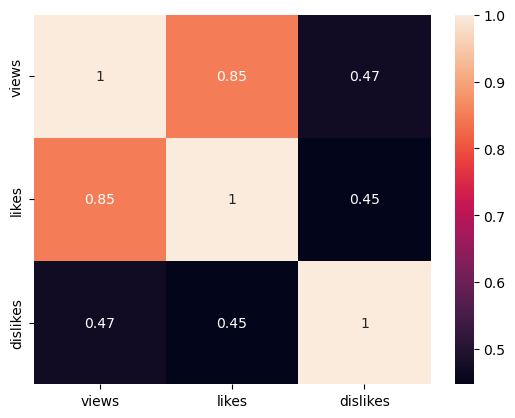

In [278]:
sns.heatmap(full_df_corr, robust = True, annot = True, linecolor = 'Black')

In [ ]:
# ANALYSIS OF CHANNELS HAVING LARGEST NO. OF TRENDING VIDEOS

In [280]:
full_df.head(6)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,like_rate,dislike_rate,comment_count_rate
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,7.686932,0.396326,2.131822
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment,4.017930,0.254095,0.525181
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Comedy,4.575780,0.167292,0.256342
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment,2.964146,0.194074,0.625350
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment,6.309732,0.094907,0.835890
5,gHZ1Qz0KiKM,17.14.11,2 Weeks with iPhone X,iJustine,28,2017-11-13T19:07:23.000Z,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,1434,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...,Science & Technology,8.191811,0.428763,1.203222


In [296]:
full_df['channel_title'].value_counts()

channel_title
ESPN                                      202
The Tonight Show Starring Jimmy Fallon    197
Netflix                                   193
Vox                                       192
TheEllenShow                              192
                                         ... 
Hin Nya                                     1
PK Inventor                                 1
Commercials Funny                           1
shoaib246                                   1
JanPaul123                                  1
Name: count, Length: 2207, dtype: int64

In [312]:
cdf = full_df.groupby(['channel_title']).size().sort_values(ascending = False).reset_index()

In [314]:
cdf

,channel_title,0
0,ESPN,202
1,The Tonight Show Starring Jimmy Fallon,197
2,Netflix,193
3,Vox,192
4,TheEllenShow,192
...,...,...
2202,Taylor Alexander,1
2203,Humble Design,1
2204,Tamar Chronicles,1
2205,BTS Videos,1


In [318]:
cdf = cdf.rename(columns = {0:'total_videos'})

In [320]:
cdf

,channel_title,total_videos
0,ESPN,202
1,The Tonight Show Starring Jimmy Fallon,197
2,Netflix,193
3,Vox,192
4,TheEllenShow,192
...,...,...
2202,Taylor Alexander,1
2203,Humble Design,1
2204,Tamar Chronicles,1
2205,BTS Videos,1


In [322]:
import plotly.express as px

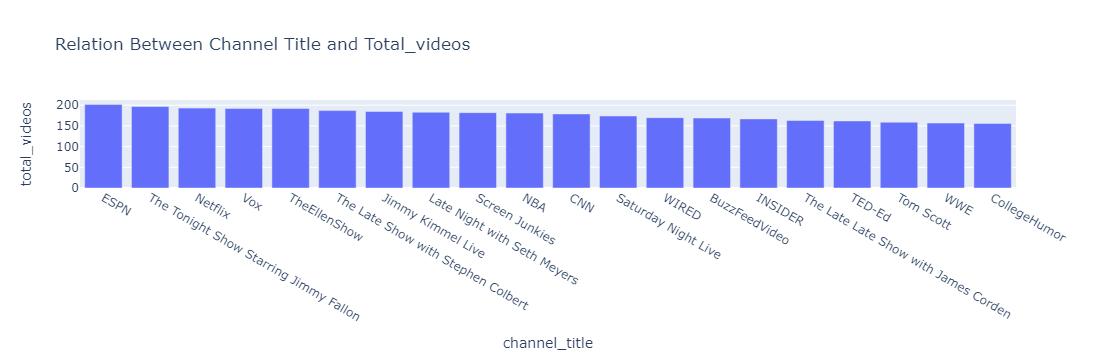

In [384]:
px.bar(data_frame = cdf.head(20), x = 'channel_title', y = 'total_videos', title = 'Relation Between Channel Title and Total_videos')

### Another method of creating the required Bar Graph

# ANALYSIS OF CHANNELS HAVING LARGEST NO. OF TRENDING VIDEOS

In [354]:
import matplotlib.pyplot as plt

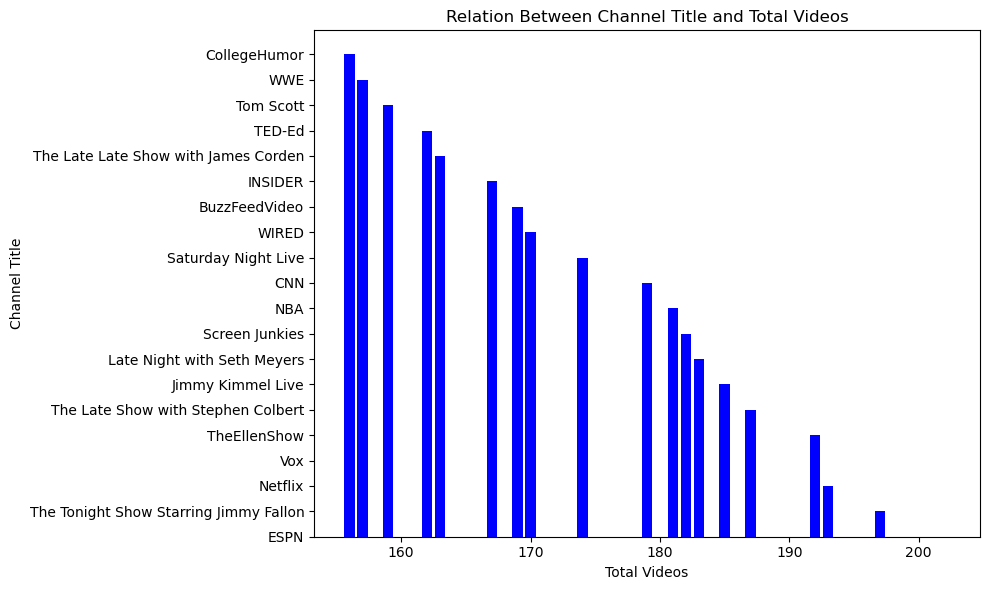

In [380]:
cdf_top20 = cdf.head(20)

plt.figure(figsize=(10, 6))
plt.bar(cdf_top20['total_videos'], cdf_top20['channel_title'], color='blue')

plt.title('Relation Between Channel Title and Total Videos')
plt.xlabel('Total Videos')
plt.ylabel('Channel Title')
plt.xticks(rotation= 'horizontal')

plt.tight_layout()  
plt.show()

# ANALYSIS OF PUNCTUATIONS IN TITLES WITH VIEWS, LIKES, DISLIKES

In [388]:
full_df['title'][0]

'WE WANT TO TALK ABOUT OUR MARRIAGE'

In [392]:
import string

In [394]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [396]:
 [char for char in full_df['title'][0] if char in string.punctuation]

[]

In [400]:
full_df['title'][1]

'The Trump Presidency: Last Week Tonight with John Oliver (HBO)'

In [414]:
 len([char for char in full_df['title'][1] if char in string.punctuation])

3

In [416]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [420]:
full_df['punc_count'] = full_df['title'].apply(punc_count)

In [422]:
full_df['punc_count']

0        0
1        3
2        3
3        2
4        3
        ..
40944    0
40945    1
40946    3
40947    0
40948    1
Name: punc_count, Length: 40901, dtype: int64

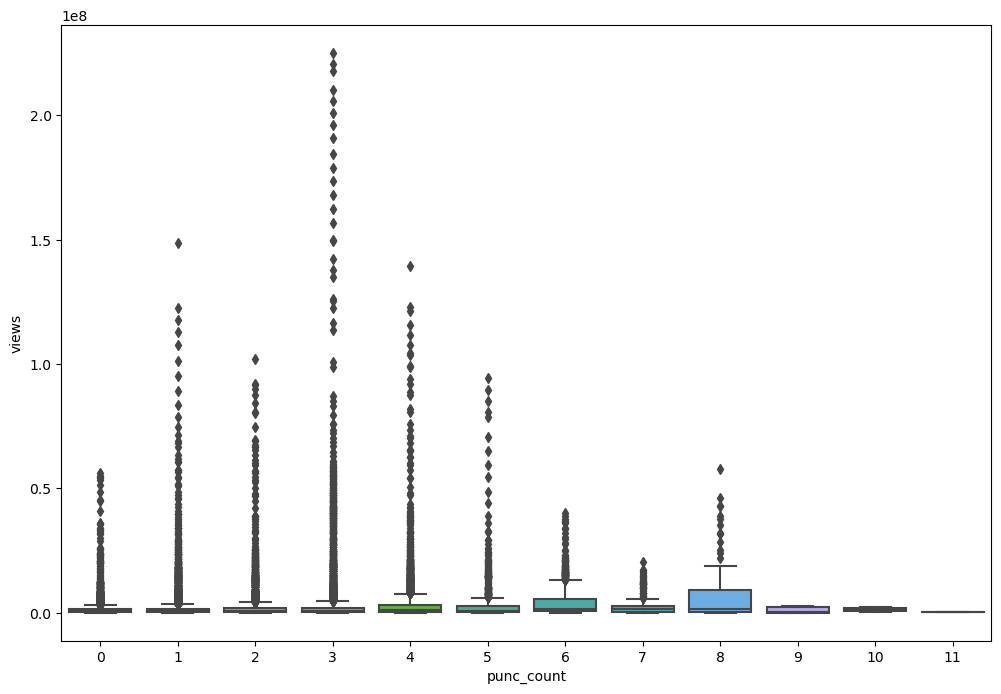

In [432]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'punc_count', y = 'views', data = full_df)
plt.show()

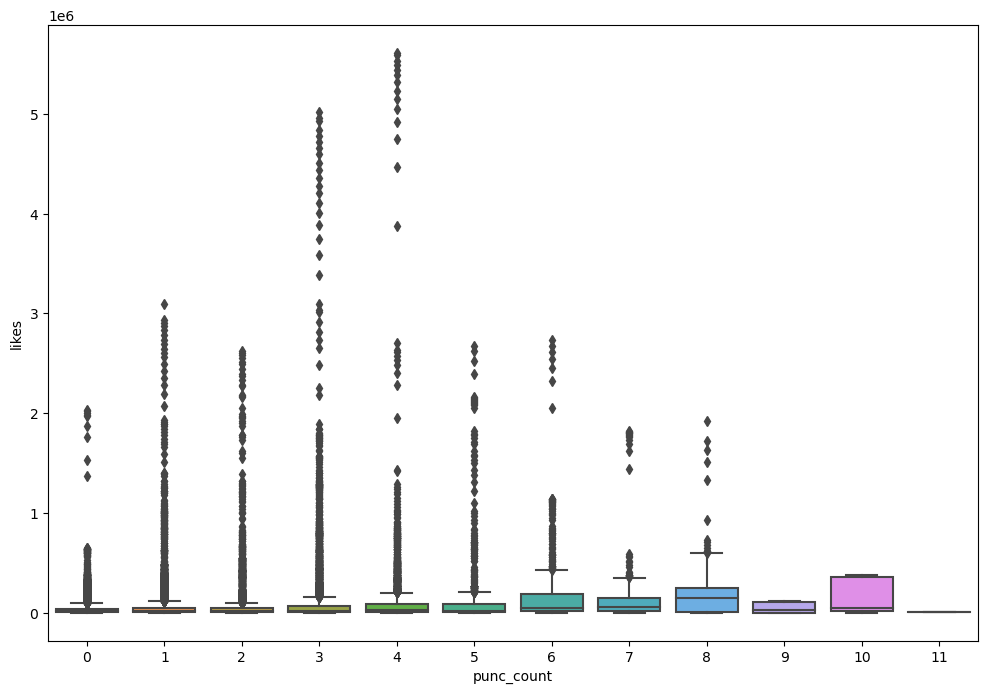

In [476]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'punc_count', y = 'likes', data = full_df)
plt.show()

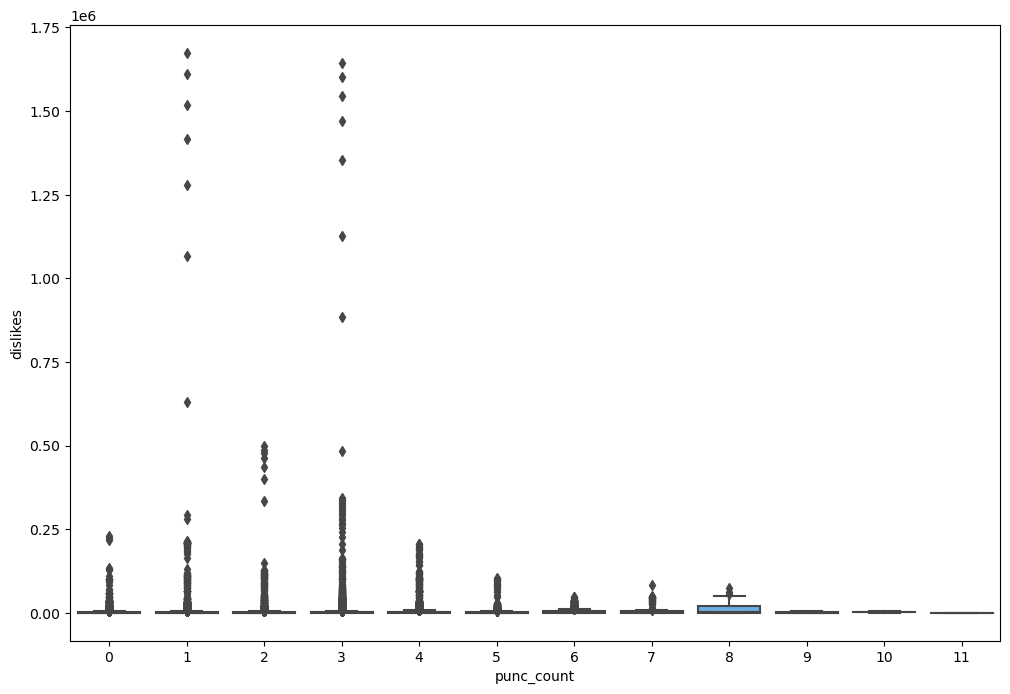

In [478]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'punc_count', y = 'dislikes', data = full_df)
plt.show()